In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = "tests/data"

data_paths = os.listdir(data_path)
data_paths = list(filter(lambda x: x.startswith("qmdmckp"), data_paths))
data_paths[0:10]

['qmdmckp_200_75_1_0_4.txt',
 'qmdmckp_100_75_1_0_1.txt',
 'qmdmckp_100_25_1_0_3.txt',
 'qmdmckp_100_50_1_0_10.txt',
 'qmdmckp_200_75_1_0_2.txt',
 'qmdmckp_100_25_1_0_9.txt',
 'qmdmckp_300_50_1_0_5.txt',
 'qmdmckp_100_50_1_0_7.txt',
 'qmdmckp_100_50_1_0_6.txt',
 'qmdmckp_200_100_1_0_9.txt']

In [3]:
results = []
for datum_path in data_paths:
    datum_fullpath = os.path.join(data_path, datum_path)
    with open(datum_fullpath) as file:
        datum = json.load(file)
        datum["name"] = datum_path
        results.append(datum)
print(results[0].keys())

dict_keys(['x', 'y', 'lambda', 'zu', 'metrics', 'name'])


### Load greedy results

In [4]:
greedy_path = "tests/profits/Greedy.txt"
profits = dict()

with open(greedy_path) as file:
    for line in file:
        name, profit = line.split()
        if not name.startswith("qmdmckp"):
            continue
        profit = float(profit)
        profits[name] = {"greedy": profit}

### Load admm results

In [5]:
admm_path = "tests/profits/Admm with 3 block.txt"

with open(admm_path) as file:
    for line in file:
        name, profit = line.split()
        if not name.startswith("qmdmckp"):
            continue
        profit = float(profit)
        profits[name]["admm"] = profit

In [6]:
### Add to results
for result in results:
    name = result["name"]
    cur_profits = profits[name]
    for key, value in cur_profits.items():
        result[key] = value
print(results[0].keys())

dict_keys(['x', 'y', 'lambda', 'zu', 'metrics', 'name', 'greedy', 'admm'])


### Lets draw!

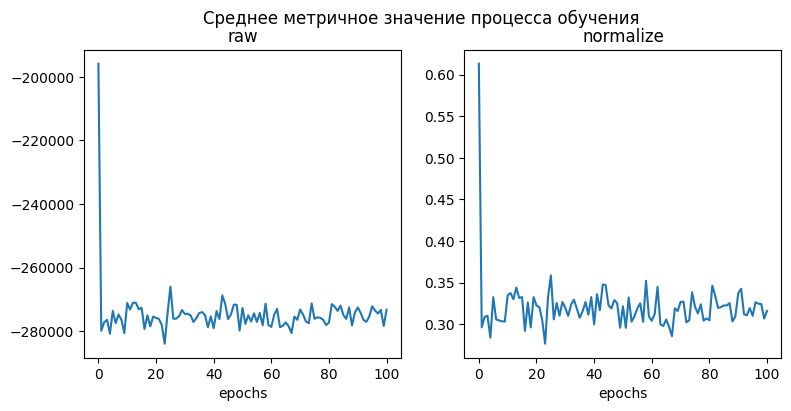

In [33]:
data = results[0]["metrics"]
mean_raw_data = np.zeros_like(data)
mean_normal_data = np.zeros_like(data)

def normal(xs):
    cur_min = min(xs)
    cur_max = max(xs)
    return list(map(lambda x: (x - cur_min) / (cur_max - cur_min), xs))

for result in results:    
    mean_raw_data += result["metrics"]
    mean_normal_data += normal(result["metrics"])

mean_raw_data /= len(results)
mean_normal_data /= len(results)

plt.figure(figsize=(9, 4))

# Raw 
plt.subplot(121)
plt.plot(mean_raw_data)
plt.xlabel("epochs")
plt.title("raw")

# Normal
plt.subplot(122)
plt.plot(mean_normal_data)
plt.xlabel("epochs")
plt.title("normalize")

plt.suptitle("Среднее метричное значение процесса обучения")
plt.show()

### Plots without initial values

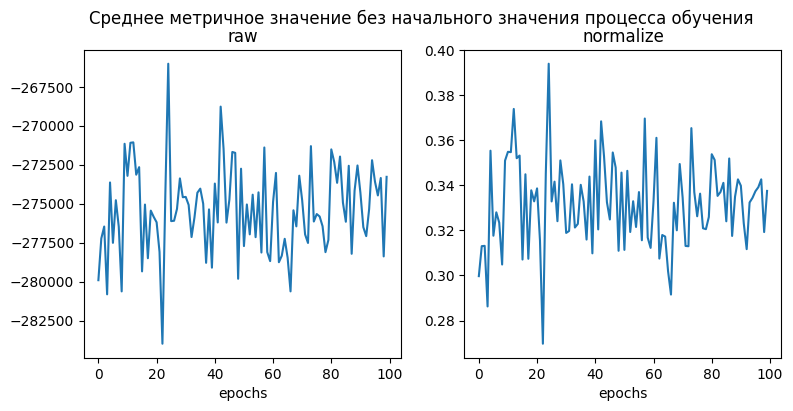

In [32]:
shifted_mean_raw_data = np.zeros_like(data[1:])
shifted_mean_normal_data = np.zeros_like(data[1:])

for result in results:
    shifted_mean_raw_data += result["metrics"][1:]
    shifted_mean_normal_data += normal(result["metrics"][1:])
    

shifted_mean_raw_data /= len(results)
shifted_mean_normal_data /= len(results)

plt.figure(figsize=(9, 4))

# Raw 
plt.subplot(121)
plt.plot(shifted_mean_raw_data)
plt.xlabel("epochs")
plt.title("raw")


# Normal
plt.subplot(122)
plt.plot(shifted_mean_normal_data)
plt.xlabel("epochs")
plt.title("normalize")

plt.suptitle("Среднее метричное значение без начального значения процесса обучения")
plt.show()

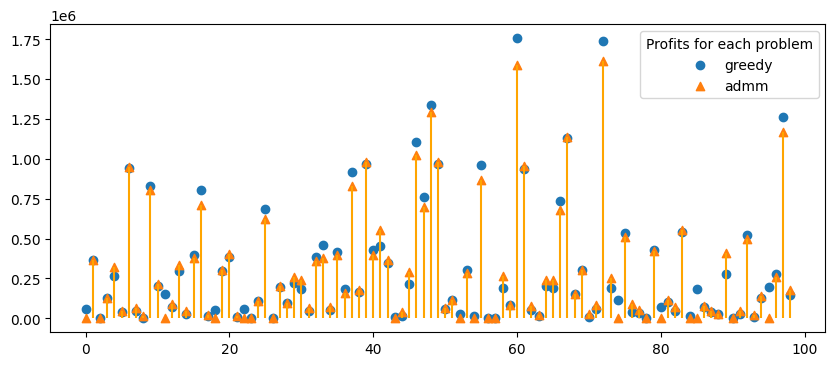

In [34]:
greedy_profits = []
admm_profits = []

plt.figure(figsize=(10, 4))

for result in results:
    greedy_profits.append(result["greedy"])
    admm_profits.append(result["admm"])

xs = np.arange(len(results))


plt.scatter(xs, greedy_profits, label="greedy")
plt.scatter(xs, admm_profits, label="admm", marker='^')
plt.vlines(xs, [0], admm_profits, color="orange")
plt.legend(title="Profits for each problem")
plt.show()